In [ ]:
## import libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from keras.datasets import cifar10 
from keras.models import Sequential 
from keras.layers import Dense  , Flatten ,Dropout 
from keras.layers import Conv2D , MaxPooling2D , BatchNormalization 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

In [ ]:
# set hyper parametars 

batch_size = 256 
num_class = 10     
epochs = 50        

In [ ]:
(train_data , y_train_label) , (test_data , y_test_label) = cifar10.load_data()       

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
### show shape of train and test data 

print(f'shape of train data :{train_data.shape}  --->  number of samples:{train_data.shape[0]}')
print(f'shape of test data  :{test_data.shape}  --->  number of samples:{test_data.shape[0]}')

shape of train data :(50000, 32, 32, 3)  --->  number of samples:50000
shape of test data  :(10000, 32, 32, 3)  --->  number of samples:10000


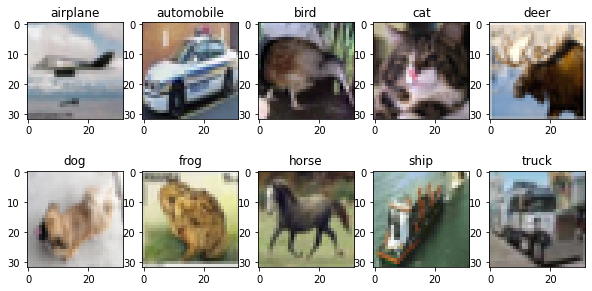

In [ ]:
# showing some data randomly --->
# we have 10 calsses 
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,5))
for i in range(num_class):
  plt.subplot(2,5,1+i)
  index = np.where(y_train_label[:]==i)[0]          ## we chose all y label that equal i
  features = train_data[index,::]                   ## chose all images that have same index  == (same name)
  random_img = np.random.randint(features.shape[0]) ## chose random image by choseen from features that has all img
  img = features[random_img,::]                     ## load image
  plt.title(classes[i])
  plt.imshow(img)
plt.show()

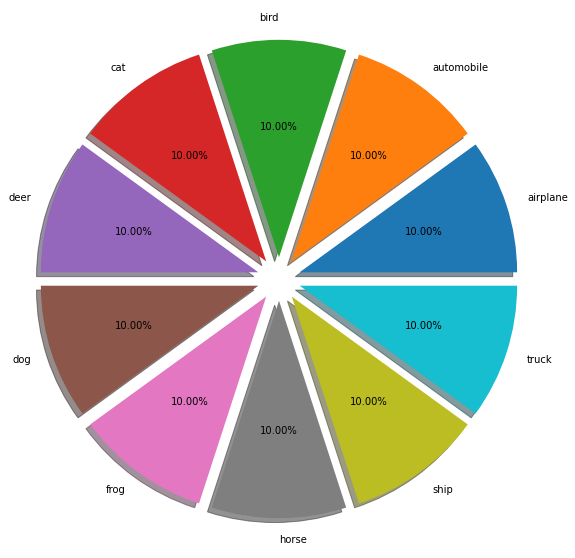

In [ ]:
DF_label = pd.DataFrame(y_train_label)
counts = DF_label.value_counts()
####
plt.figure(figsize = (10,10))
plt.pie(counts.values , labels=classes , autopct='%1.2f%%' , shadow=True , explode =(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.show()

In [ ]:
y_train_label

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# Convert class vectors to binary class matrices.
y_train_label2 = tf.keras.utils.to_categorical(y_train_label , num_class) 
y_test_label2  = tf.keras.utils.to_categorical(y_test_label , num_class)

# shape 
y_train_label2.shape , y_test_label2.shape

((50000, 10), (10000, 10))

In [ ]:
# show labels 
y_train_label2[:5]                   

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_label2[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
train_shape = train_data.shape[1:]
train_shape

(32, 32, 3)

# creat model

In [ ]:
CNN_model = Sequential()
  
CNN_model.add( Conv2D(64 ,kernel_size=(3,3) , padding='same' , input_shape=train_shape  , activation ='relu'  ))
CNN_model.add( BatchNormalization()  )
CNN_model.add( Conv2D(64 , kernel_size=(3,3) , activation ='relu'  ))
CNN_model.add( BatchNormalization() )
CNN_model.add( MaxPooling2D(pool_size = (2,2))) ###  4 ----> max --->   1
CNN_model.add( Dropout(0.25))                   ## avoid over fiting    ## 

CNN_model.add( Conv2D(128, (3, 3), padding='same'  , activation='relu'  ))
CNN_model.add( BatchNormalization())
CNN_model.add( Conv2D(128, (3, 3)  , activation='relu'  ))
CNN_model.add( BatchNormalization())
CNN_model.add( MaxPooling2D(pool_size=(2, 2)))
CNN_model.add( Dropout(0.25))

CNN_model.add( Flatten()  )                  ##  Deep Neural Network   ### 1D
CNN_model.add( Dense(256 , activation ='relu')   )
CNN_model.add( Dropout(0.25))
CNN_model.add( Dense(num_class ,activation='softmax' ))    ###  final output      ###  exp^z / sum(exp^all)      


In [ ]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                        

# train model

In [ ]:
CNN_model.compile(loss ='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])   ###  crossentropy-----> classification   
                                                  ## opimal weights                             ###  categorical---->10 multi 
## normalization data 
X_train = train_data /255   ## 
X_test  = test_data /255    ## 

y_train = y_train_label2 
y_test  = y_test_label2

## train model 
model_load = CNN_model.fit(X_train , y_train , epochs= epochs , batch_size = batch_size , validation_data=(X_test ,y_test)  , shuffle=True )




Epoch 1/50
196/196 [==============================] - 18s 49ms/step - loss: 1.6175 - accuracy: 0.4482 - val_loss: 4.7097 - val_accuracy: 0.1000
Epoch 2/50
196/196 [==============================] - 9s 44ms/step - loss: 1.0947 - accuracy: 0.6089 - val_loss: 3.2679 - val_accuracy: 0.2494
Epoch 3/50
196/196 [==============================] - 9s 44ms/step - loss: 0.8873 - accuracy: 0.6882 - val_loss: 1.1031 - val_accuracy: 0.6086
Epoch 4/50
196/196 [==============================] - 9s 44ms/step - loss: 0.7586 - accuracy: 0.7319 - val_loss: 0.8401 - val_accuracy: 0.7097
Epoch 5/50
196/196 [==============================] - 9s 44ms/step - loss: 0.6630 - accuracy: 0.7662 - val_loss: 0.7451 - val_accuracy: 0.7427
Epoch 6/50
196/196 [==============================] - 9s 47ms/step - loss: 0.5926 - accuracy: 0.7924 - val_loss: 0.7601 - val_accuracy: 0.7524
Epoch 7/50
196/196 [==============================] - 9s 45ms/step - loss: 0.5341 - accuracy: 0.8103 - val_loss: 0.6777 - val_accuracy: 0.767

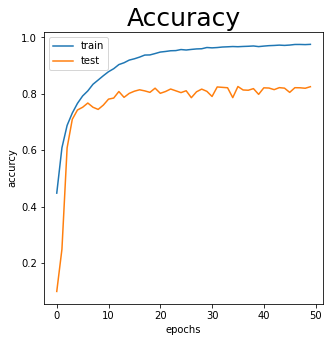

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(model_load.history['accuracy'])
plt.plot(model_load.history['val_accuracy'])
plt.title('Accuracy' , size=25)
plt.xlabel('epochs')
plt.ylabel('accurcy') 
plt.legend(['train' ,'test'] , loc ='upper left')
plt.show()



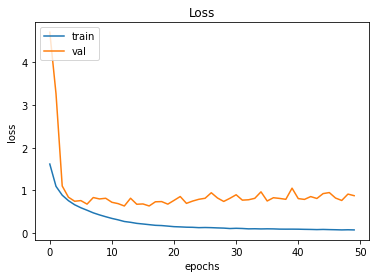

In [ ]:

plt.plot(model_load.history['loss'])
plt.plot(model_load.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' ,'val'] , loc='upper left')
plt.show()

In [ ]:
random_int = np.random.randint(1,100,4)
random_int

array([27, 52, 33,  5])

# prediction

In [ ]:
prediction = CNN_model.predict(X_test)    
 
    

313/313 [==============================] - 1s 2ms/step


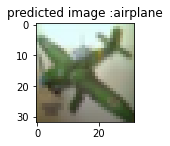

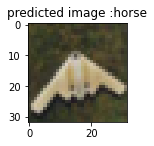

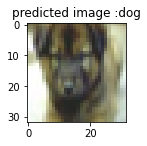

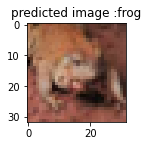

In [ ]:
for i , val in enumerate(random_int):     ## for i in (5,2,6,3)
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[val])
    plt.title(f'predicted image :{classes[np.argmax(prediction[val] , axis=0)]}')
    plt.grid(False)
    plt.show()
    

In [ ]:
### our output is not catigorical ---> so we do it 

pre_out =[]
for i in range(len(prediction)):
  max_arg = np.argmax(prediction[i])
  pre_out.append([max_arg])

out = np.array(pre_out)
categorical_out = tf.keras.utils.to_categorical(out , num_class)
categorical_out[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
precision = precision_score(y_test ,categorical_out ,  average = 'micro')   #Calculate metrics globally by counting the total true positives, false negatives and false positives.

In [ ]:
precision

0.8252

In [ ]:
recall = recall_score(y_test ,categorical_out,  average = 'micro')
recall

0.8252

In [ ]:
fscore = f1_score(y_test ,categorical_out,  average = 'micro')
fscore

0.8252

In [ ]:
## manually   f1-score = 2*(  precision*recall /  (precision + recall)   ) 

f1_s = 2*(  precision*recall /  (precision + recall)   )
f1_s

0.8252